In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import astropy.units as u
from scipy.interpolate import interp1d
from scipy.integrate import simps

### Luminosity function prediction

In [3]:
candidates = pd.read_csv('/home/yuan/JWST/CentralDogma/2_Lust_/bd23.csv')
mcmc = pd.read_csv('/home/yuan/JWST/BD_mcmc/mcmc_result.csv')
# add new column to mcmc
mcmc['F444W'] = candidates['MAG_AUTO_F444W']
mcmc['F444W_err'] = candidates['MAGERR_AUTO_F444W']
mcmc['F277W'] = candidates['MAG_AUTO_F277W']
mcmc['F277W_err'] = candidates['MAGERR_AUTO_F277W']
mcmc['F150W'] = candidates['MAG_AUTO_F150W']
mcmc['F150W_err'] = candidates['MAGERR_AUTO_F150W']
mcmc['F115W'] = candidates['MAG_AUTO_F115W']
mcmc['F115W_err'] = candidates['MAGERR_AUTO_F115W']
mcmc.to_csv('/home/yuan/JWST/BD_mcmc/mcmc_result.csv', index=False)

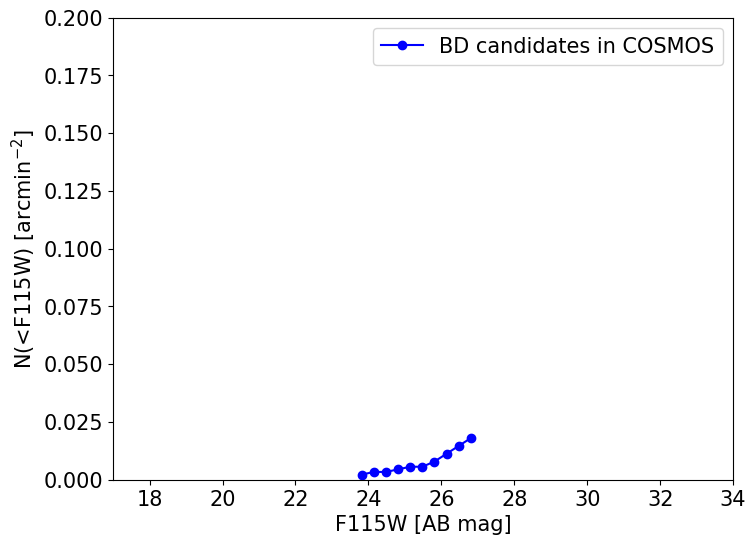

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

early_Ttype = mcmc.loc[mcmc['type']<6]

Nbd, hgrid = np.histogram(early_Ttype['F115W'], bins=10)
Nbd = np.cumsum(Nbd)/(0.247*3600)

ax.plot(hgrid[:-1], Nbd, marker='o', color='b', label='BD candidates in COSMOS')

ax.set_xlabel('F115W [AB mag]', fontsize=15)
ax.set_ylabel('N(<F115W) [arcmin$^{-2}$]', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

ax.set_ylim(0, 0.2)
ax.set_xlim(17, 34)

plt.show()

In [18]:
early_Ttype

,ID,T_eff,T_eff_uperr,T_eff_loerr,T_peak,log_g,log_g_uperr,log_g_loerr,log_g_peak,M,...,distance_peak,type,F444W,F444W_err,F277W,F277W_err,F150W,F150W_err,F115W,F115W_err
0,BD01,957,8.2,15.9,959,5.5,0.09,1.18,5.51,-0.5,...,496,5,24.345978,0.006669,26.853968,0.037154,25.977965,0.029904,25.363228,0.021371
1,BD02,1192,45.4,50.3,1210,4.7,0.42,0.53,4.88,-0.1,...,1988,2,26.366202,0.047679,28.036931,0.080436,27.065271,0.090406,27.137457,0.105814
2,BD03,947,17.4,28.1,948,5.4,0.15,0.35,5.47,-0.5,...,763,4,25.285140,0.013379,27.820438,0.089107,26.705369,0.073533,26.460133,0.057208
3,BD04,1218,6.5,19.6,1200,5.0,0.08,0.35,5.12,0.0,...,466,4,23.453909,0.003230,25.128271,0.009275,24.219190,0.007172,23.822920,0.005918
5,BD06,1512,44.6,50.8,1519,5.4,0.12,0.21,5.50,-0.5,...,2572,0,26.685791,0.054647,28.064998,0.080943,26.562888,0.091908,26.826175,0.066881
6,BD07,1283,34.9,47.7,1281,5.2,0.30,0.45,5.29,-0.3,...,1503,4,26.069635,0.028522,27.761901,0.094697,26.590314,0.071706,26.358188,0.046346
7,BD08,1214,7.4,8.4,1214,4.5,0.07,0.09,4.46,0.0,...,945,3,24.517067,0.007882,26.008439,0.017992,25.238093,0.015663,25.120627,0.018219
8,BD09,1401,35.2,41.1,1405,5.4,0.17,0.29,5.55,-0.5,...,2075,3,26.469245,0.038366,28.005423,0.078099,26.713166,0.075575,26.640124,0.056927
9,BD10,1298,26.3,32.1,1303,5.4,0.13,0.35,5.49,-0.4,...,1540,5,26.082398,0.024483,27.737016,0.067933,26.764680,0.056763,26.203110,0.045106
10,BD11,1022,29.8,29.4,1019,4.4,0.52,0.52,4.38,-0.1,...,1525,5,25.897801,0.024919,27.944101,0.124009,27.179683,0.079523,26.568537,0.058174


### Use flux table to calculate distant

In [179]:
dir1 = '/home/yuan/LePhare/lephare_dev/sed/STAR/'
spectrum_files = dir1+'STAR_MOD_ALL2.list'
flux_tables = glob.glob(dir1+'Sonora_Bobcat/flux_table/*')

In [38]:
flux_tables

['/home/yuan/LePhare/lephare_dev/sed/STAR/Sonora_Bobcat/flux_table/flux_table_JWST+0.0',
 '/home/yuan/LePhare/lephare_dev/sed/STAR/Sonora_Bobcat/flux_table/flux_table_JWST+0.5',
 '/home/yuan/LePhare/lephare_dev/sed/STAR/Sonora_Bobcat/flux_table/flux_table_JWST-0.5']

In [180]:
def flumbda2fnu(wl, flu):
    
    flu = flu * u.erg / u.s / u.AA / u.cm**2
    fnu = flu.to(u.erg / u.s / u.Hz / u.cm**2,
            equivalencies=u.spectral_density(wl * u.AA))
    
    return fnu.value

def fnu2flumbda(wl, fnu):
    
    fnu = fnu * u.erg / u.s / u.Hz / u.cm**2
    flu = fnu.to(u.erg / u.s / u.AA / u.cm**2,
            equivalencies=u.spectral_density(wl * u.AA))
    
    return flu.value

def read_data_file(file):
    
    with open(file, 'r') as f:
        lines = f.readlines()
    data = []
    
    for line in lines:
        if line[0] != '#':
            data.append([float(x) for x in line.split()])
    # make data a pd.DataFrame
    data = pd.DataFrame(data)
    data.columns = ['x', 'y']
    return data

def read_filter_file(_filter):
    
    ''' read in the filter data
    Returns:
    --------
    data : pandas.DataFrame [x, y] = [frequency (Hz), transmission]
        The filter data
    
    parameters:
    -----------
    _filter : string
        The name of the JWST filter, e.g. F115W
    '''
    
    dir = '/home/yuan/LePhare/lephare_dev/filt/jwst/'
    
    data = read_data_file(dir+_filter.lower()+'.pb')
    
    x = np.array(data['x'])
    x = x*u.AA
    x = x.to(u.Hz, equivalencies=u.spectral())
    
    data['x'] = x.value
    
    return data

def read_LePhare_result(data_file):
    
    ''' read in the LePhare result file and return the model name and fitted flux
    Returns:
    --------
    model_name : string
        The name of the model
        
    spec_data : pandas.DataFrame [x, y] = [frequency (Hz), flux (uJy)]
        The fitted flux data
        
    Parameters:
    -----------
    data_file : string
        The path of the LePhare result file
    '''
    
    # read in the data
    
    spec = [] # star sed, [float, float]
    MODname = [] # model name list, string
    Ldir = '/home/yuan/LePhare/lephare_dev/sed/STAR/'
    
    with open(Ldir+'STAR_MOD_ALL2.list', 'r') as f:
        lines = f.readlines()
    for line in lines:
        MODname.append(line.split('\t')[0].split('/')[-1][:-5])
    
    with open(data_file, 'r') as f2:
        data = f2.readlines()
        model_name = MODname[int(data[12].split()[2])-1]
        
        # fitted flux
        startline = int(data[5].split()[1])+int(data[7].split()[1])+int(data[11].split()[1])+23
        # print(startline)
        for j in range(startline, len(data)):
            spec.append([float(data[j].split()[0]), float(data[j].split()[1])])
        spec = np.array(spec)
        
        # result file output unit is mag, convert to uJy
        mag2uJy = lambda x: 10**((23.9-x)/2.5)
        spec[:,1] = mag2uJy(spec[:,1])
        
        # result file output unit is wavelength, convert to frequency
        spec[:,0] = (spec[:,0] * u.AA).to(u.Hz, equivalencies=u.spectral()).value
        
        spec_data = pd.DataFrame(spec)
        spec_data.columns = ['x', 'y']
    
    return model_name, spec_data

def read_flux_table(flux_table):
    
    file = flux_table
    with open(file, 'r') as f:
        lines = f.readlines()
        
    data = []
    header = lines[6].split()
    for i in range(len(lines)-8):
        data.append([float(x) for x in lines[i+8].split()])
    
    data = pd.DataFrame(data, columns=header)
        
    return data

def resample(frequency, fnu, _filter, norm=False):
    
    """ Resample model to the filter x grid 
    
    Returns:
    --------
    filter_data['x'] : np.array
        The filter x grid
    
    interpolated_fnu : np.array
        The resampled model fnu values
    
    Parameters:
    -----------
    frequency : array-like
        The frequency of the model flux
        
    fnu : array-like
        The model flux
        
    _filter : string
        The filter name
    """
    
    filter_data = read_filter_file(_filter)
    
    # interpolate model to the filter x grid
    f = interp1d(frequency, fnu, kind='linear', fill_value="extrapolate")
    interpolated_fnu = f(filter_data['x'])
    
    if norm:
        # calculate the integral of the filter
        integral = simps(filter_data['y'], filter_data['x'])
        
        # calculate the integral of the model
        integral_model = simps(interpolated_fnu, filter_data['x'])
        
        # normalize the model
        interpolated_fnu = interpolated_fnu * integral / integral_model
    
    return np.array(filter_data['x']), np.array(interpolated_fnu)

def observed_flux(frequency, fnu, _filter, output='uJy'):
    
    """ Calculate the observed flux of the model
    
    Returns:
    --------
    mag : float
        The observed magnitude of the model flux passed through the filter
        
    Parameters:
    -----------
    frequency : array-like
        The frequency of the model flux
        
    fnu : array-like
        The model flux
        
    _filter : string
        The filter name
    
    output : string
        The output unit, 'mag' or 'uJy'
            mag: return the magnitude
            uJy: return log \int fnu(uJy)*filter dnu
    """
    
    model_data = resample(frequency, fnu, _filter)
    filter_data = read_filter_file(_filter)
    
    # zero point
    zp = 3631*10**6 # uJy
    Izp = -simps(zp*filter_data['y'], filter_data['x'])
    # calculate the total flux
    total_flux = -simps(model_data[1]*filter_data['y'], model_data[0])
    # print(total_flux, Izp)
    
    mag = -2.5*np.log10(total_flux/Izp)
    
    if output == 'mag':
        return mag
    
    if output == 'uJy':
        return (23.9-mag)*0.4


In [33]:
flux_table = read_flux_table(flux_tables[0])
flux_tablep = read_flux_table(flux_tables[1])
flux_tablem = read_flux_table(flux_tables[2])

In [181]:
name, spec = read_LePhare_result('./BD_24/Id000000024.spec')
# a, b, c = observed_flux(spec['x'], spec['y'], 'F115W', output='uJy')
flux = [
    observed_flux(spec['x'], spec['y'], 'F115W', output='mag'),
    observed_flux(spec['x'], spec['y'], 'F150W', output='mag'),
    observed_flux(spec['x'], spec['y'], 'F277W', output='mag'),
    observed_flux(spec['x'], spec['y'], 'F444W', output='mag')
]
print(name, '\n', flux)

sp_t950g562nc_m0 
 [26.504985595255214, 27.32038591158506, 28.23797510379269, 25.76005952108609]


In [169]:
name, spec = read_LePhare_result('./BD_24/Id000000024.spec')
# a, b, c = observed_flux(spec['x'], spec['y'], 'F115W', output='uJy')
flux = [
    observed_flux(spec['x'], spec['y'], 'F115W', output='uJy'),
    observed_flux(spec['x'], spec['y'], 'F150W', output='uJy'),
    observed_flux(spec['x'], spec['y'], 'F277W', output='uJy'),
    observed_flux(spec['x'], spec['y'], 'F444W', output='uJy')
]
print(name, '\n', flux)

sp_t950g562nc_m0 
 [-1.0419942381020861, -1.3681543646340246, -1.7351900415170762, -0.7440238084344373]


In [170]:
np.log10(562)+2

4.749736315569061

In [171]:
columns = ['Teff', 'log(g)', 'F115W', 'F150W', 'F277W', 'F444W']
a = flux_table.loc[flux_table['Teff']==950, columns]
a

,Teff,log(g),F115W,F150W,F277W,F444W
23,950.0,3.000,0.4001,0.0811,0.0475,0.7220
62,950.0,3.255,0.3327,0.0205,-0.0595,0.6682
101,950.0,3.505,0.3074,-0.0084,-0.1487,0.6305
140,950.0,3.748,0.2879,-0.0312,-0.2297,0.6000
179,950.0,4.000,0.2601,-0.0605,-0.3141,0.5632
218,950.0,4.250,0.2157,-0.1043,-0.4045,0.5158
257,950.0,4.500,0.1586,-0.1627,-0.4980,0.4585
296,950.0,4.750,0.0912,-0.2326,-0.5936,0.3926
335,950.0,5.000,0.0150,-0.3101,-0.6903,0.3210
374,950.0,5.250,-0.0718,-0.3947,-0.7893,0.2444


In [172]:
n=8
modelflux = a.values[n-1][2:]
print(modelflux)
distance = lambda x, y: 10*np.sqrt(10**(3+x-y))
distance(modelflux, flux)

[ 0.0912 -0.2326 -0.5936  0.3926]


array([1165.72770741, 1168.89952545, 1177.05029567, 1170.33961079])

In [175]:
dd = pd.read_csv('BD_24_distance.csv')

D = []

for i in range(len(dd)):
    
    ddd = sum([dd['F115W'][i], 
            dd['F150W'][i], 
            dd['F277W'][i],  
            dd['F444W'][i],])/4
    D.append(ddd)
    print(dd['id'][i], ddd)

1 485.26226649750004
2 2178.69603101
3 750.690261555
4 496.16545948
5 nan
6 1027.9002663375
7 2464.82222879
8 1906.73001204
9 977.3244607775
10 2015.92482286
11 1515.18578069
12 1533.8486567525001
13 1179.469550655
14 623.6723777175
15 1404.4103980749999
16 218.179331155
17 2022.8639679174998
18 2045.7200879775
19 864.3297958825001
20 2074.5124529025
21 1166.3134295175
22 330.55396576
23 1328.7831597875
24 1170.50428483


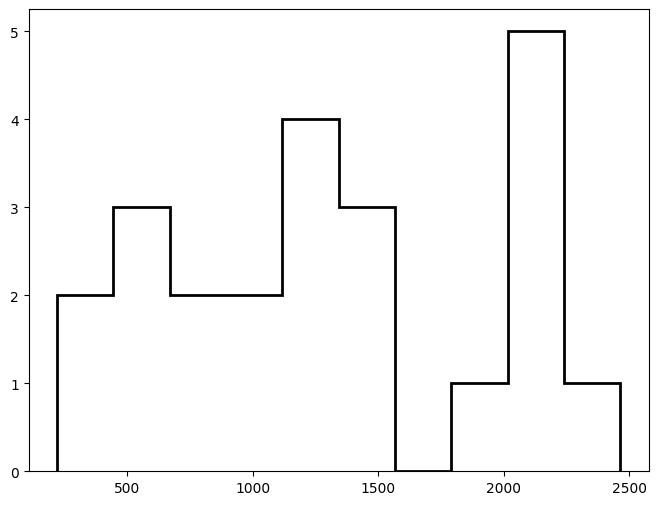

In [177]:
fid, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.hist(D, bins=10, histtype='step', color='k', lw=2)

plt.show()

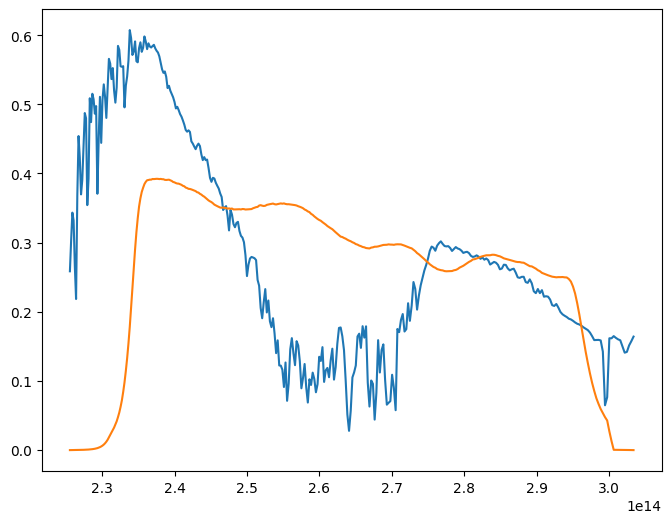

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(c, a, label='model')
ax.plot(c, b, label='filter')

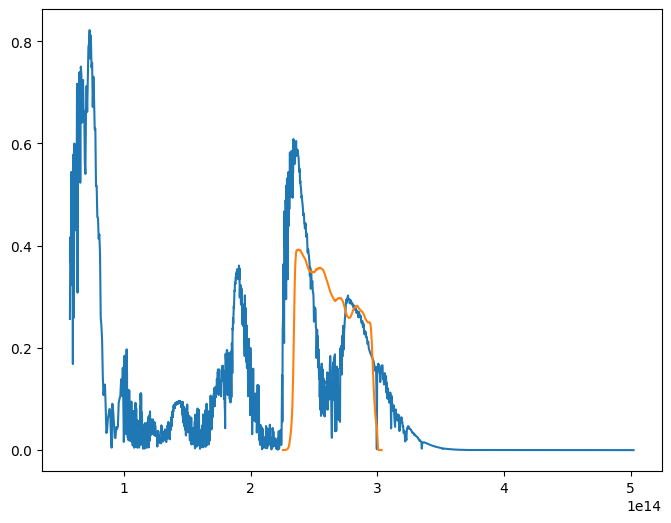

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

name, spec = read_LePhare_result('./BD_24/Id000000001.spec')
transmit = read_filter_file('F115W')

ax.plot(spec['x'], spec['y'], label=name)
ax.plot(transmit['x'], transmit['y'], label='F115W')

### gro

[Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

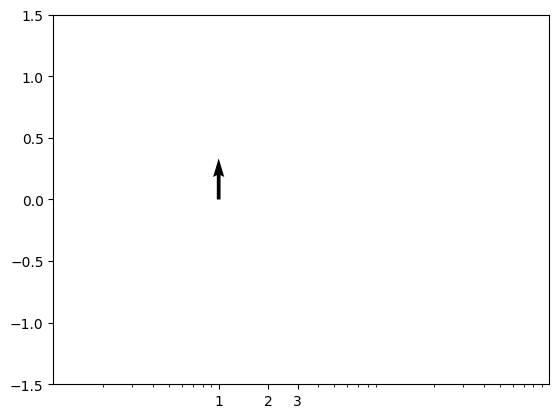

In [12]:
fig, ax = plt.subplots()

ax.quiver(1, 0, 0, 1, angles='xy', scale_units='xy', scale=3, headwidth=3)

ax.set_xlim(0.1, 1e2)
ax.set_ylim(-1.5, 1.5)

ax.set_xscale('log')

ax.set_xticks([1, 2, 3])


ax.set_xticklabels([1, 2, 3])

### each type spec

In [2]:
def read_data_file(file):
    
    with open(file, 'r') as f:
        lines = f.readlines()
    data = []
    
    for line in lines:
        if line[0] != '#':
            data.append([float(x) for x in line.split()])
    # make data a pd.DataFrame
    data = pd.DataFrame(data)
    data.columns = ['x', 'y']
    return data

def spec(n):
    
    specdir = '/home/yuan/LePhare/lephare_dev/sed/STAR/bdtype_spec_ds.list'
    specname = '/home/yuan/LePhare/lephare_dev/sed/STAR/bdtype_specname.list'
    
    with open(specdir, 'r') as f:
        lines = f.readlines()
    with open(specname, 'r') as f2:
        names = f2.readlines()
        
    data = read_data_file('/home/yuan/LePhare/lephare_dev/sed/STAR/'+lines[n].strip())
    name = names[n].strip()
    
    return name, data

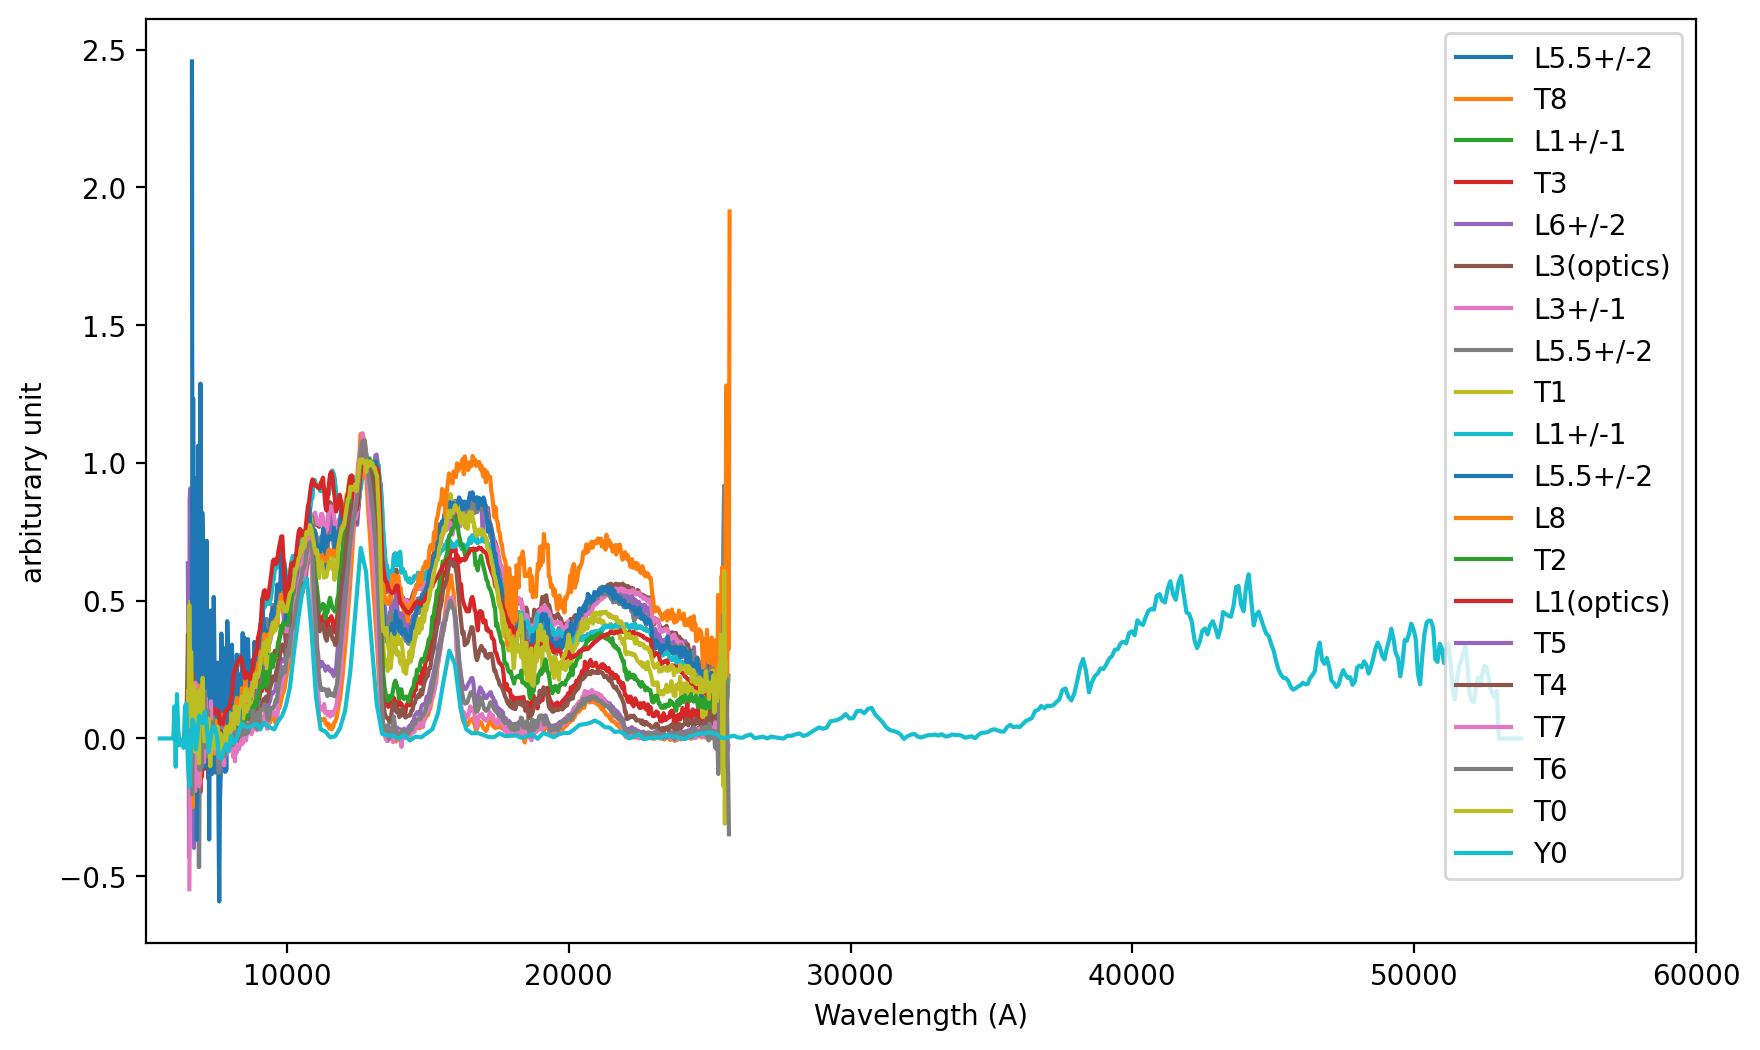

In [9]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)

for i in range(19):
    ax.plot(spec(i)[1]['x'], spec(i)[1]['y'], label=spec(i)[0])
    
ax.plot(spec(19)[1]['x'], spec(19)[1]['y']/2e6, label=spec(19)[0])

ax.set_xlabel('Wavelength (A)')
ax.set_ylabel('arbiturary unit')

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(5e3, 6e4)
# ax.set_ylim(5e-3, 3e0)

ax.legend()

### csv to input file

In [3]:
data = pd.read_csv('/home/yuan/JWST/CentralDogma/4_Greed_/good.csv')

mag = data[[
    'MAG_AUTO_F115W', 'MAGERR_AUTO_F115W', 'MAG_AUTO_F150W', 'MAGERR_AUTO_F150W',
    'MAG_AUTO_F277W', 'MAGERR_AUTO_F277W', 'MAG_AUTO_F444W', 'MAGERR_AUTO_F444W'
]]

# save mag to a txt file
np.savetxt('bd24.in', mag, fmt='%s')

### model mag 

In [30]:
def read_dat(filename):
    # read the .dat file
    data = pd.read_csv(filename, sep='\s+', header=None, skiprows=0)
    # y is fluxdensity in wavelength, x is wavelength
    data.columns = ['x', 'y']
    return data

def read_data_file(file):
    
    with open(file, 'r') as f:
        lines = f.readlines()
    data = []
    
    for line in lines:
        if line[0] != '#':
            data.append([float(x) for x in line.split()])
    # make data a pd.DataFrame
    data = pd.DataFrame(data)
    data.columns = ['x', 'y']
    return data

def resample(model, _filter, norm=False):
    
    """ Resample model to the filter wavelength 
    
    Returns:
    --------
    _filter['x'] : array-like
        The filter x values
    
    y : array-like
        The resampled model y values
    
    Parameters:
    -----------
    model : dict
        The model data
    _filter : dict
        The filter data
    """
    
    # interpolate model to the filter wavelength
    f = interp1d(model['x'], model['y'], kind='linear', fill_value="extrapolate")
    y = f(_filter['x'])
    
    if norm:
        # calculate the integral of the filter
        integral = simps(_filter['y'], _filter['x'])
        
        # calculate the integral of the model
        integral_model = simps(y, _filter['x'])
        
        # normalize the model
        y = y * integral / integral_model
    
    return _filter['x'], y

def flumbda2fnu(wl, flu):
    
    flu = flu * u.erg / u.s / u.AA / u.cm**2
    fnu = flu.to(u.erg / u.s / u.Hz / u.cm**2,
            equivalencies=u.spectral_density(wl * u.AA))
    
    return fnu.value

def fnu2flumbda(wl, fnu):
    
    fnu = fnu * u.erg / u.s / u.Hz / u.cm**2
    flu = fnu.to(u.erg / u.s / u.AA / u.cm**2,
            equivalencies=u.spectral_density(wl * u.AA))
    
    return flu.value

def observed_mag(flu, wavelength, _filter):
    
    """ Calculate the observed magnitude of the model
    
    Returns:
    --------
    mag : float
        The observed magnitude of the model flux passed through the filter
        
    Parameters:
    -----------
    flu : array-like
        The model flux
        
    wavelength : array-like
        The wavelength of the model flux
        
    _filter : dict
        The filter data
    
    """
    
    nu = 3e18 / wavelength
    fnu = flumbda2fnu(np.array(wavelength), flu)
    
    mag = -2.5 * np.log10(
        simps(fnu*_filter['y'], nu) / simps(3631*_filter['y'], nu)
    )
    
    return mag

def plot_Fmodel_cc(data, Nfilter, plot=False):
    
    """ Plot the model flux on the color color plot
    
    Returns:
    --------
    Temperature : array-like
        The temperature of the model
        
    F115W : array-like
        The F115W magnitude of the model
        
    F277W : array-like
        The F277W magnitude of the model
        
    F444W : array-like
        The F444W magnitude of the model
        
    Parameters:
    ----------
    data : array-like
        The model data
        
    _filter : array-like
        The filter data
        
    plot : bool
        If True, plot the color-color plot
    """
    
    Temperature = []
    F115W = []
    F277W = []
    F444W = []
    
    for i in range(len(data)):
        
        model = read_dat(data[i])
        
        if (float(data[i].split('/')[-1].split('t')[1].split('g')[0]) < 1310) & (float(data[i].split('/')[-1].split('t')[1].split('g')[0]) > 470):
        
            _filter = read_data_file(Nfilter[0])
            x, y = resample(model, _filter)
            F115W.append(observed_mag(y, x, _filter))
            
            _filter = read_data_file(Nfilter[2])
            x, y = resample(model, _filter)
            F277W.append(observed_mag(y, x, _filter))
            
            _filter = read_data_file(Nfilter[3])
            x, y = resample(model, _filter)
            F444W.append(observed_mag(y, x, _filter))
            
            Temperature.append(
                float(data[i].split('/')[-1].split('t')[1].split('g')[0])
            )
            
        else:
            pass
        
    F115W = np.array(F115W)
    F277W = np.array(F277W)
    F444W = np.array(F444W)
    Temperature = np.array(Temperature)
        
    if plot:
        plt.figure(figsize=(10, 10))
        
        # plot the model flux on the color-color plot and use T as colorbar
        # Turn Temperature into color map
        
        
        plt.scatter(F277W-F444W, F115W-F277W, c=Temperature, cmap='viridis', label='Model')
        
        plt.colorbar(label='Temperature')
        
        
        plt.plot([1.1, 1.1], [-4, -0.8], color='black', lw=1, alpha=0.5)
        plt.plot([1.1, 5], [-0.8, -0.8], color='black', lw=1, alpha=0.5)
        
        plt.xlabel('F115W-F277W')
        plt.ylabel('F277W-F444W')
        plt.title('Color-Color Plot')
        plt.legend()
        plt.show()
    else:
        return Temperature, F115W, F277W, F444W

def ccplot(data, candi, magtype="AUTO", save=False):
    
    m444 = data[f'MAG_{magtype}_F444W']
    m277 = data[f'MAG_{magtype}_F277W']
    # m150 = data[f'MAG_{magtype}_F150W']
    m115 = data[f'MAG_{magtype}_F115W']
    
    m444c = candi[f'MAG_{magtype}_F444W']
    m277c = candi[f'MAG_{magtype}_F277W']
    # m150 = candi[f'MAG_{magtype}_F150W']
    m115c = candi[f'MAG_{magtype}_F115W']
    
    # print(m115c)

    # selected = data.loc[(m277-m444+data.MAGERR_BEST_277+data.MAGERR_BEST_444>1.1)&(m115-m277-data.MAGERR_BEST_115+data.MAGERR_BEST_277<-0.8)]
    selected = data.loc[(m277-m444>1.1)&(m115-m277<-0.8)]

    plt.figure(figsize=(7, 5), dpi=200)

    # plt.scatter(m277-m444, m115-m277, 
    #             s=2, label='COSMOS-Webb sources', color='#AAAAAA', alpha=0.5)
    
    hb = plt.hexbin(
        m277-m444, m115-m277,
        gridsize=1000, cmap='Greys', bins='log'
    )
    
    plt.errorbar(selected[f'MAG_{magtype}_F277W']-selected[f'MAG_{magtype}_F444W'], selected[f'MAG_{magtype}_F115W']-selected[f'MAG_{magtype}_F277W'], 
                np.sqrt(selected[f'MAGERR_{magtype}_F277W']**2+selected[f'MAGERR_{magtype}_F444W']**2), 
                np.sqrt(selected[f'MAGERR_{magtype}_F115W']**2+selected[f'MAGERR_{magtype}_F277W']**2),
            color='red', ls='', lw=1, fmt='.', label='Sources pass color criteria')
    # plt.plot([1.1, 1.1], [-4, -0.8], color='black', lw=1, alpha=0.5)
    # plt.plot([1.1, 5], [-0.8, -0.8], color='black', lw=1, alpha=0.5)
    plt.scatter(low_m[2]-low_m[3], low_m[1]-low_m[2], c=low_m[0], s=8,
                marker='v', cmap='viridis', label='0.5 Solar metallicity BD Model')
    plt.scatter(nor_m[2]-nor_m[3], nor_m[1]-nor_m[2], c=nor_m[0], s=8,
                marker='o', cmap='viridis', label='1.0 Solar metallicity BD Model')
    plt.scatter(high_m[2]-high_m[3], high_m[1]-high_m[2], c=high_m[0], s=8,
                marker='^', cmap='viridis', label='1.5 Solar metallicity BD Model')
    
    # plt.plot(low_m[2]-low_m[3], low_m[1]-low_m[2], c='k')
    # plt.plot(nor_m[2]-nor_m[3], nor_m[1]-nor_m[2], c='k')
    # plt.plot(high_m[2]-high_m[3], high_m[1]-high_m[2], c='k')
    
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=18)  # Change colorbar tick label fontsize
    cbar.set_label(label='Sonora-Bobcat T$_{eff}$ [K]' , fontsize=20)  # Change colorbar label fontsize
    
    plt.plot([1.1, 1.1], [-4, -0.8], color='#555555', lw=2, alpha=1,
            label='Selection criteria from Wang et al.', zorder=1)
    plt.plot([1.1, 15], [-0.8, -0.8], color='#555555', lw=2, alpha=1, zorder=1)
    
    plt.scatter(m277c-m444c, m115c-m277c, 
                marker='*', s=25, label='BD candidates', color='black', alpha=0.9, zorder=10)

    
    plt.xlim(-2, 6)
    plt.ylim(-4, 4)
    
    plt.xlabel('F277W - F444W [mag]', fontsize=20)
    plt.ylabel('F115W - F277W [mag]', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    # larger fontsize for colorbar
    
    cbar.ax.tick_params(labelsize=15)
    
    # plt.title(f'Color-color plot of all sources')
    
    plt.legend(loc='upper right', fontsize=12)
    
    plt.tight_layout()
    
    if save:
        plt.savefig('/home/yuan/JWST/louvre/bd_ccmodelflux.png', format='png', dpi=200)
    
    plt.show()
    
    return selected

def cc_para(data, candi, para, th1, th2, magtype="AUTO"):
    
    m444 = data[f'MAG_{magtype}_F444W'].loc[data[para] < th2]
    m277 = data[f'MAG_{magtype}_F277W'].loc[data[para] < th2]
    m115 = data[f'MAG_{magtype}_F115W'].loc[data[para] < th2]
    
    m444b = data[f'MAG_{magtype}_F444W'].loc[data[para] > th1]
    m277b = data[f'MAG_{magtype}_F277W'].loc[data[para] > th1]
    m115b = data[f'MAG_{magtype}_F115W'].loc[data[para] > th1]
    
    m444c = candi[f'MAG_{magtype}_F444W']
    m277c = candi[f'MAG_{magtype}_F277W']
    m115c = candi[f'MAG_{magtype}_F115W']
    
    # print(m115c)

    # selected = data.loc[(m277-m444+data.MAGERR_BEST_277+data.MAGERR_BEST_444>1.1)&(m115-m277-data.MAGERR_BEST_115+data.MAGERR_BEST_277<-0.8)]
    # selected = data.loc[(m277-m444>1.1)&(m115-m277<-0.8)]

    plt.figure(figsize=(10, 7), dpi=200)

    # plt.scatter(m277-m444, m115-m277, 
    #             s=2, label='COSMOS-Webb sources', color='#AAAAAA', alpha=0.5)
    
    plt.scatter(m277-m444, m115-m277, 
                s=3, label=f'elongation<{th2}', color='black', alpha=0.5)
    
    plt.scatter(m277b-m444b, m115b-m277b, 
                s=3, label=f'elongation>{th1}', color='#00CCDD', alpha=0.5)
    
    # plt.errorbar(selected[f'MAG_{magtype}_F277W']-selected[f'MAG_{magtype}_F444W'], selected[f'MAG_{magtype}_F115W']-selected[f'MAG_{magtype}_F277W'], 
    #             np.sqrt(selected[f'MAGERR_{magtype}_F277W']**2+selected[f'MAGERR_{magtype}_F444W']**2), 
    #             np.sqrt(selected[f'MAGERR_{magtype}_F115W']**2+selected[f'MAGERR_{magtype}_F277W']**2),
    #         color='red', ls='', lw=1, fmt='.', label=f'{len(selected)} candidates pass color criteria')
    # plt.plot([1.1, 1.1], [-4, -0.8], color='black', lw=1, alpha=0.5)
    # plt.plot([1.1, 5], [-0.8, -0.8], color='black', lw=1, alpha=0.5)
    # plt.scatter(low_m[2]-low_m[3], low_m[1]-low_m[2], c=low_m[0], s=8,
    #             marker='v', cmap='viridis', label='0.5 Solar metallicity BD Model')
    # plt.scatter(nor_m[2]-nor_m[3], nor_m[1]-nor_m[2], c=nor_m[0], s=8,
    #             marker='o', cmap='viridis', label='1.0 Solar metallicity BD Model')
    # plt.scatter(high_m[2]-high_m[3], high_m[1]-high_m[2], c=high_m[0], s=8,
    #             marker='^', cmap='viridis', label='1.5 Solar metallicity BD Model')
    # plt.colorbar(label='Temperature')
    
    plt.plot([1.1, 1.1], [-4, -0.8], color='#555555', lw=2, alpha=1,
            label='Selection criteria from Wang et. al', zorder=1)
    plt.plot([1.1, 15], [-0.8, -0.8], color='#555555', lw=2, alpha=1, zorder=1)
    
    plt.scatter(m277c-m444c, m115c-m277c, 
                marker='*', s=25, label='Final candidates', color='black', alpha=0.9, zorder=10)

    
    plt.xlim(-2, 6)
    plt.ylim(-4, 4)
    
    plt.xlabel('F277W - F444W [mag]')
    plt.ylabel('F115W - F277W [mag]')
    # plt.title(f'Color-color plot of all sources')
    
    plt.legend(loc='upper right')
    
    plt.show()

def read_model(data_file):
    # read in the data
    
    spec = [] # star sed, [float, float]
    MODname = [] # model name list, string
    Ldir = '/home/yuan/LePhare/lephare_dev/sed/STAR/'
    
    with open(Ldir+'STAR_MOD_ALL2.list', 'r') as f:
        lines = f.readlines()
    for line in lines:
        MODname.append(line.split('\t')[0].split('/')[-1][:-5])
    
    with open(data_file, 'r') as f2:
        data = f2.readlines()
        star_model = MODname[int(data[12].split()[2])-1]
        
        # fitted flux
        startline = int(data[5].split()[1])+int(data[7].split()[1])+int(data[11].split()[1])+23
        # print(startline)
        for j in range(startline, len(data)):
            spec.append([float(data[j].split()[0]), float(data[j].split()[1])])
        spec = np.array(spec)
        
        mag2uJjy = lambda x: 10**((23.9-x)/2.5)
        spec[:,1] = mag2uJy(spec[:,1])
        
    # model flux
    with open(Ldir+'Sonora_Bobcat/spec_ds/'+star_model+'.dat', 'r') as f:
        data = f.readlines()
        model = []
        for j in range(1, len(data)):
            model.append([float(data[j].split()[0]), float(data[j].split()[1])])
        model = np.array(model)
        # print(model[:,0])
    
    return star_model, spec, model

def read_JWST_filter(_filter):
    
    dir = '/home/yuan/LePhare/lephare_dev/filt/jwst/'
    return read_data_file(dir+_filter)

def plot_Fmodel_cc(data, Nfilter, plot=False):
    
    """ JWST filter magnitude calculation
    
    Returns:
    --------
        
    F115W : array-like
        The F115W magnitude of the model
        
    F277W : array-like
        The F277W magnitude of the model
        
    F444W : array-like
        The F444W magnitude of the model
        
    Parameters:
    ----------
    data : array-like
        The model data
        
    _filter : array-like
        The filter data
        
    plot : bool
        If True, plot the color-color plot
    """
    F115W = []
    F277W = []
    F444W = []
    
    for i in range(len(data)):
        
        model = read_dat(data[i])
        
        if (float(data[i].split('/')[-1].split('t')[1].split('g')[0]) < 1310) & (float(data[i].split('/')[-1].split('t')[1].split('g')[0]) > 470):
        
            _filter = read_data_file(Nfilter[0])
            x, y = resample(model, _filter)
            F115W.append(observed_mag(y, x, _filter))
            
            _filter = read_data_file(Nfilter[2])
            x, y = resample(model, _filter)
            F277W.append(observed_mag(y, x, _filter))
            
            _filter = read_data_file(Nfilter[3])
            x, y = resample(model, _filter)
            F444W.append(observed_mag(y, x, _filter))
            
            Temperature.append(
                float(data[i].split('/')[-1].split('t')[1].split('g')[0])
            )
            
        else:
            pass
        
    F115W = np.array(F115W)
    F277W = np.array(F277W)
    F444W = np.array(F444W)
    Temperature = np.array(Temperature)
        
    return F115W, F277W, F444W

In [ ]:
filter_name = sorted(glob.glob('/home/yuan/LePhare/lephare_dev/filt/jwst/*'))
filter_name.append('/home/yuan/LePhare/lephare_dev/filt/hst/F814W.pb')
# data_name = sorted(glob.glob('STAR/Sonora_Bobcat/spec_ds/*g*nc_m0.dat'))
data_files = sorted(glob.glob('/home/yuan/LePhare/lephare_dev/bd_fit/BD_20/*.spec'))

In [ ]:
star_model, spec, model = read_model(data_files[0])

### given mag test

In [19]:
# read txt file
def read_data_file(file):
    
    with open(file, 'r') as f:
        lines = f.readlines()
    data = []
    
    for line in lines:
        if line[0] != '#':
            data.append([float(x) for x in line.split()])
    data = np.array(data)
    return data[0][6:-1]

In [28]:
mag = read_data_file('modelmag.txt')
# F070W   F090W   F115W   F140M   F150W  F150W2   F162M   F164N   F182M   F187N   F200W   F210M   F212N   F250M   F277W   F300M  F322W2   F323N   F335M   F356W   F360M   F405N   F410M   F430M   F444W   F460M   F466N   F470N   F480M   F560W   F770W  F1000W  F1065C  F1130W  F1140C    F1280W  F1500W  F1550C  F1800W  F2100W  F2300C  F2550W   FND
filter1 = [1.15, 1.5, 2.77, 4.44]
filters = [0.7, 0.9, 1.15, 1.4, 1.5, 1.52, 1.62, 1.64, 1.82, 1.87, 2.0, 2.1, 2.12, 2.5, 2.77, 3.0, 3.22, 3.23, 3.35, 3.56, 3.6, 4.05, 4.1, 4.3, 4.44, 4.6, 4.66, 4.7, 4.8, 5.6, 7.7, 10.0, 10.65, 11.3, 11.4, 12.8, 15.0, 15.5, 18.0, 21.0, 23.0, 25.5]

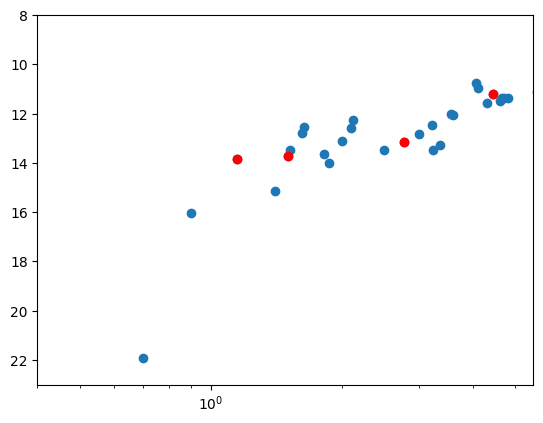

In [29]:
fig, ax = plt.subplots()
ax.plot(filters, mag, 'o')
ax.plot(filter1, [13.829, 13.705, 13.137, 11.215], 'ro')
ax.set_ylim(23, 8)
# ax.set_yscale('log')
ax.set_xlim(0.4, 5.5)
ax.set_xscale('log')
plt.show()

### bolo maybe wrong

In [ ]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

In [2]:
data_files = sorted(glob.glob('*.spec'))
# data_files

In [3]:
def read_model(data_file):
    # read in the data
    
    spec = [] # star sed, [float, float]
    MODname = [] # model name list, string
    Ldir = '/home/yuan/LePhare/lephare_dev/sed/STAR/'
    
    with open(Ldir+'STAR_MOD_ALL2.list', 'r') as f:
        lines = f.readlines()
    for line in lines:
        MODname.append(line.split('\t')[0].split('/')[-1][:-5])
    
    with open(data_file, 'r') as f2:
        data = f2.readlines()
        star_model = MODname[int(data[12].split()[2])-1]
        
        # fitted flux
        startline = int(data[5].split()[1])+int(data[7].split()[1])+int(data[11].split()[1])+23
        # print(startline)
        for j in range(startline, len(data)):
            spec.append([float(data[j].split()[0]), float(data[j].split()[1])])
        spec = np.array(spec)
        
        mag2uJjy = lambda x: 10**((23.9-x)/2.5)
        spec[:,1] = mag2uJy(spec[:,1])
        
    # model flux
    with open(Ldir+'Sonora_Bobcat/spec_ds/'+star_model+'.dat', 'r') as f:
        data = f.readlines()
        model = []
        for j in range(1, len(data)):
            model.append([float(data[j].split()[0]), float(data[j].split()[1])])
        model = np.array(model)
        # print(model[:,0])
    
    return star_model, spec, model

def mbolo(spec):
    
    wavelength = spec[:,0]
    flux = spec[:,1]
    
    # calculate the bolometric magnitude
    # integrate the flux over the wavelength
    
    # convert wavelength to frequency
    # frequency = 3e8/(wavelength*1e-6)
    # convert flux to Jy
    # flux = flux*1e-26
    # calculate the integral
    integral = np.trapz(flux, wavelength)
    # convert to magnitude
    # mag = -2.5*np.log10(integral) - 48.6
    
    return integral


In [10]:
name, data, model = read_model(data_files[3])
print(data)

[[5.96968700e+03 2.30904714e-08]
 [5.99361330e+03 3.46883466e-08]
 [6.01763550e+03 5.08369164e-08]
 ...
 [5.15485130e+04 6.95659628e-02]
 [5.18933120e+04 6.92744043e-02]
 [5.22404180e+04 4.73315144e-02]]


In [5]:
np.trapz(data[:,1], data[:,0])

1955.931634589727

In [8]:
mbolo(data)

-1198921779.9148126

3, 11, 12, 14

In [4]:
distances = []

for i in range(len(data_files)):
    name, data, model = read_model(data_files[i])
    print(i+1, name, np.sqrt(mbolo(model)/mbolo(data))*10)
    distances.append(np.sqrt(abs(mbolo(model)/mbolo(data)))*10)

1 sp_t1300g316nc_m-0.5 1857.9933926617632
2 sp_t1400g3160nc_m-0.5 3389.3922719511984
3 sp_t1000g178nc_m0 677.3731989672485
4 sp_t1200g1000nc_m+0.5 2278.479782460392
5 sp_t850g3160nc_m-0.5 241.79855112839775
6 sp_t1400g1780nc_m-0.5 2902.9724647636135
7 sp_t1300g3160nc_m-0.5 2118.8913439648713
8 sp_t1000g178nc_m0 1202.0735301521254
9 sp_t1300g562nc_m0 619.6613478782353
10 sp_t1000g562nc_m+0.5 1319.627115655953
11 sp_t1200g3160nc_m0 1587.1015624898243
12 sp_t1200g1000nc_m0 540.288733871024
13 sp_t700g3160nc_m-0.5 321.0265137768322
14 sp_t1000g316nc_m+0.5 1143.8321451204695
15 sp_t950g562nc_m0 1059.689643946016
16 sp_t950g3160nc_m-0.5 577.2398455730224
17 sp_t1100g178nc_m0 1751.032291880359
18 sp_t950g3160nc_m-0.5 892.9776048355154
19 sp_t1300g1000nc_m-0.5 2120.7029407203754
20 sp_t850g562nc_m+0.5 821.9871360454352


Text(0.5, 1.0, 'Distance Distribution of BDs')

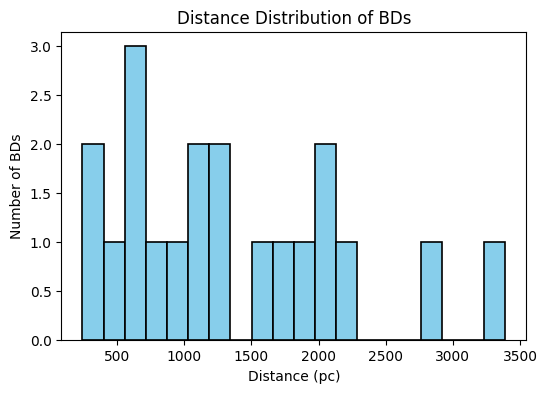

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.hist(distances, bins=20, color='skyblue', edgecolor='black', linewidth=1.2)

ax.set_xlabel('Distance (pc)')
ax.set_ylabel('Number of BDs')
ax.set_title('Distance Distribution of BDs')
# ax.set_xlim(0, 4000)

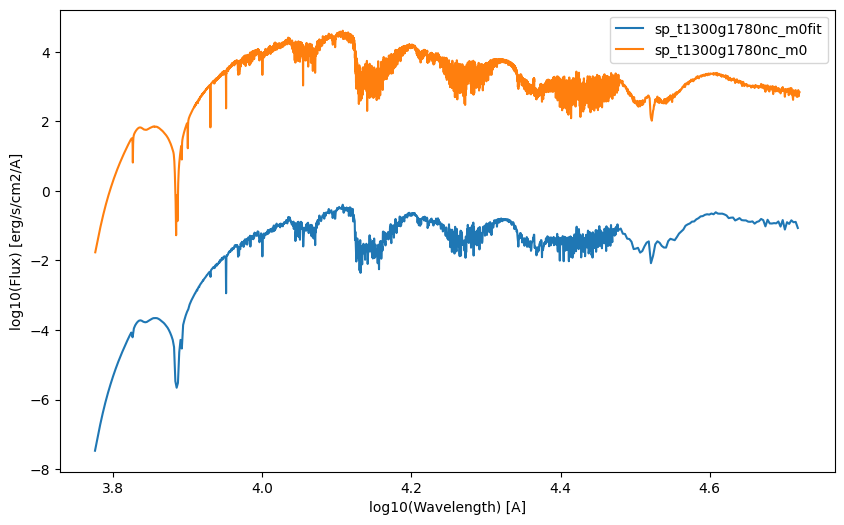

In [55]:
# plot the data in log scale

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.log10(data[:,0]), np.log10(data[:,1]), label=name+'fit')
ax.plot(np.log10(model[:,0]), np.log10(model[:,1]), label=name)

ax.set_xlabel('log10(Wavelength) [A]')
ax.set_ylabel('log10(Flux) [erg/s/cm2/A]')
ax.legend()
plt.show()

In [46]:
A = [5, 4, 5, 5, 4, 4]
B = [2, 5, 5, 4, 3, 2]
C = [5, 3, 5, 5, 5, 3]
D = [3, 4, 4, 1, 3, 4]
E = [5, 4, 5, 5, 5, 4]
F = [5, 5, 3, 4, 3, 3]
bins = [0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]

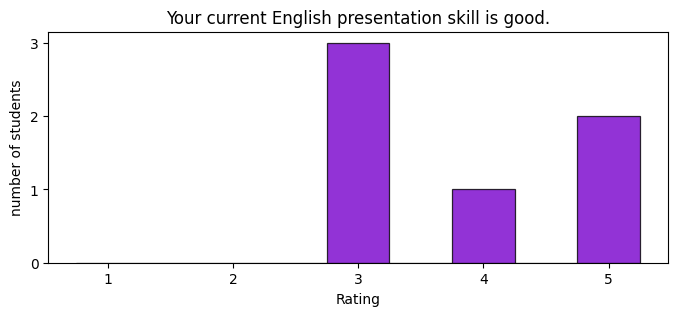

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

ax.hist(F, bins=bins, color='#7700CC', edgecolor='black', linewidth=0.9, alpha=0.8)

ax.set_xlabel('Rating')
ax.set_ylabel('number of students')

ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.set_title('Your current English presentation skill is good.')

plt.show()